<h1>OKCupid Project</h1>


<h1>Introduction</h1>

This is a study to help my understanding of machine learning techniques. We're looking at a dataset taken from okcupid by the codecademy library. 

The goal of this project is to scope, prep, analyse, and create a machine learning model to solve a question.


**Data sources:**

`profiles.csv` was provided by Codecademy.com.

In [45]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score, accuracy_score, roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [46]:
df = pd.read_csv('profiles.csv', encoding='utf-8')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


<h3> Data Charactistics </h3>

**Age** : Continuous Variable

**Body_type** : Categorical Variable

**Diet** :  Categorical Variable

**Drugs** :  Categorical Variable

**Education** :  Categorical Variable

**Ethnicity** :  Categorical Variable

**Height** : Continuous Variable 

**Income** : Continuous Variable

**Job** : Categorical Variable 

**Last_online** : Date Variable  

**Location** : Categorical Variable

**Offspring** : Categorical variable

**Orientation** : Categorical variable

**Pets** : Categorical variable

**Religion** : Categorical variable

**Sex** : Categorical variable

**Sign** : Categorical variable      

**Smokes** : Categorical variable    

**Speaks** : Categorical variable

**Status** :Categorical variable

In [47]:
df.nunique()

age               54
body_type         12
diet              18
drinks             6
drugs              3
education         32
essay0         54350
essay1         51516
essay2         48635
essay3         43533
essay4         49260
essay5         48963
essay6         43603
essay7         45554
essay8         39324
essay9         45443
ethnicity        217
height            60
income            13
job               21
last_online    30123
location         199
offspring         15
orientation        3
pets              15
religion          45
sex                2
sign              48
smokes             5
speaks          7647
status             5
dtype: int64

In [48]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


<h2> Cleaning Data </h2>

Many of the columns contain too many unique answers e.g The star signs contain 48 unique answers but should only have 12 different options.  

In [49]:
df['signsCleaned'] = df.sign.str.split().str.get(0)
df.signsCleaned.value_counts()

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

In [50]:
df['religionCleaned'] = df.religion.str.split().str.get(0)
df.religionCleaned.value_counts()

agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: religionCleaned, dtype: int64

<h2> Investigating Continuous Variables </h2>

Age, height and income are now investigated using distribution plots.


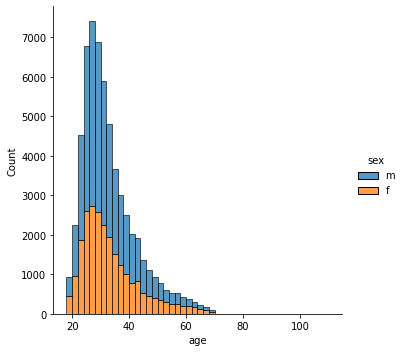

In [51]:
sns.displot(data=df, x='age', hue='sex', kind='hist', binwidth=2, multiple='stack')

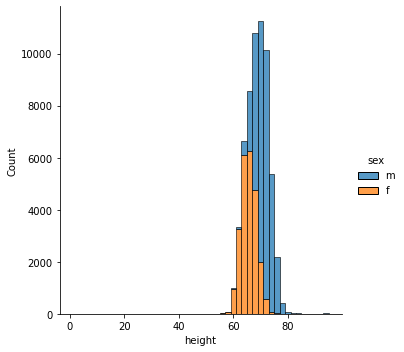

In [52]:
sns.displot(data=df, x='height', hue='sex', kind='hist', binwidth=2, multiple='stack')

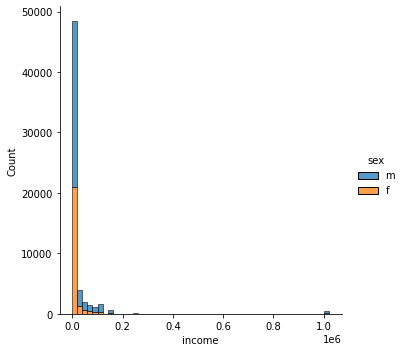

In [53]:
sns.displot(data=df, x="income",hue="sex", kind="hist", binwidth = 20000, multiple = "stack");

<h2> Investigating Discrete Variables </h2>

Body type, diet, drugs, education, ethnicity, job, location, offspring, orientation, pets, religion, sex, sign, smokes, speaks and status are now investigated using count plots.


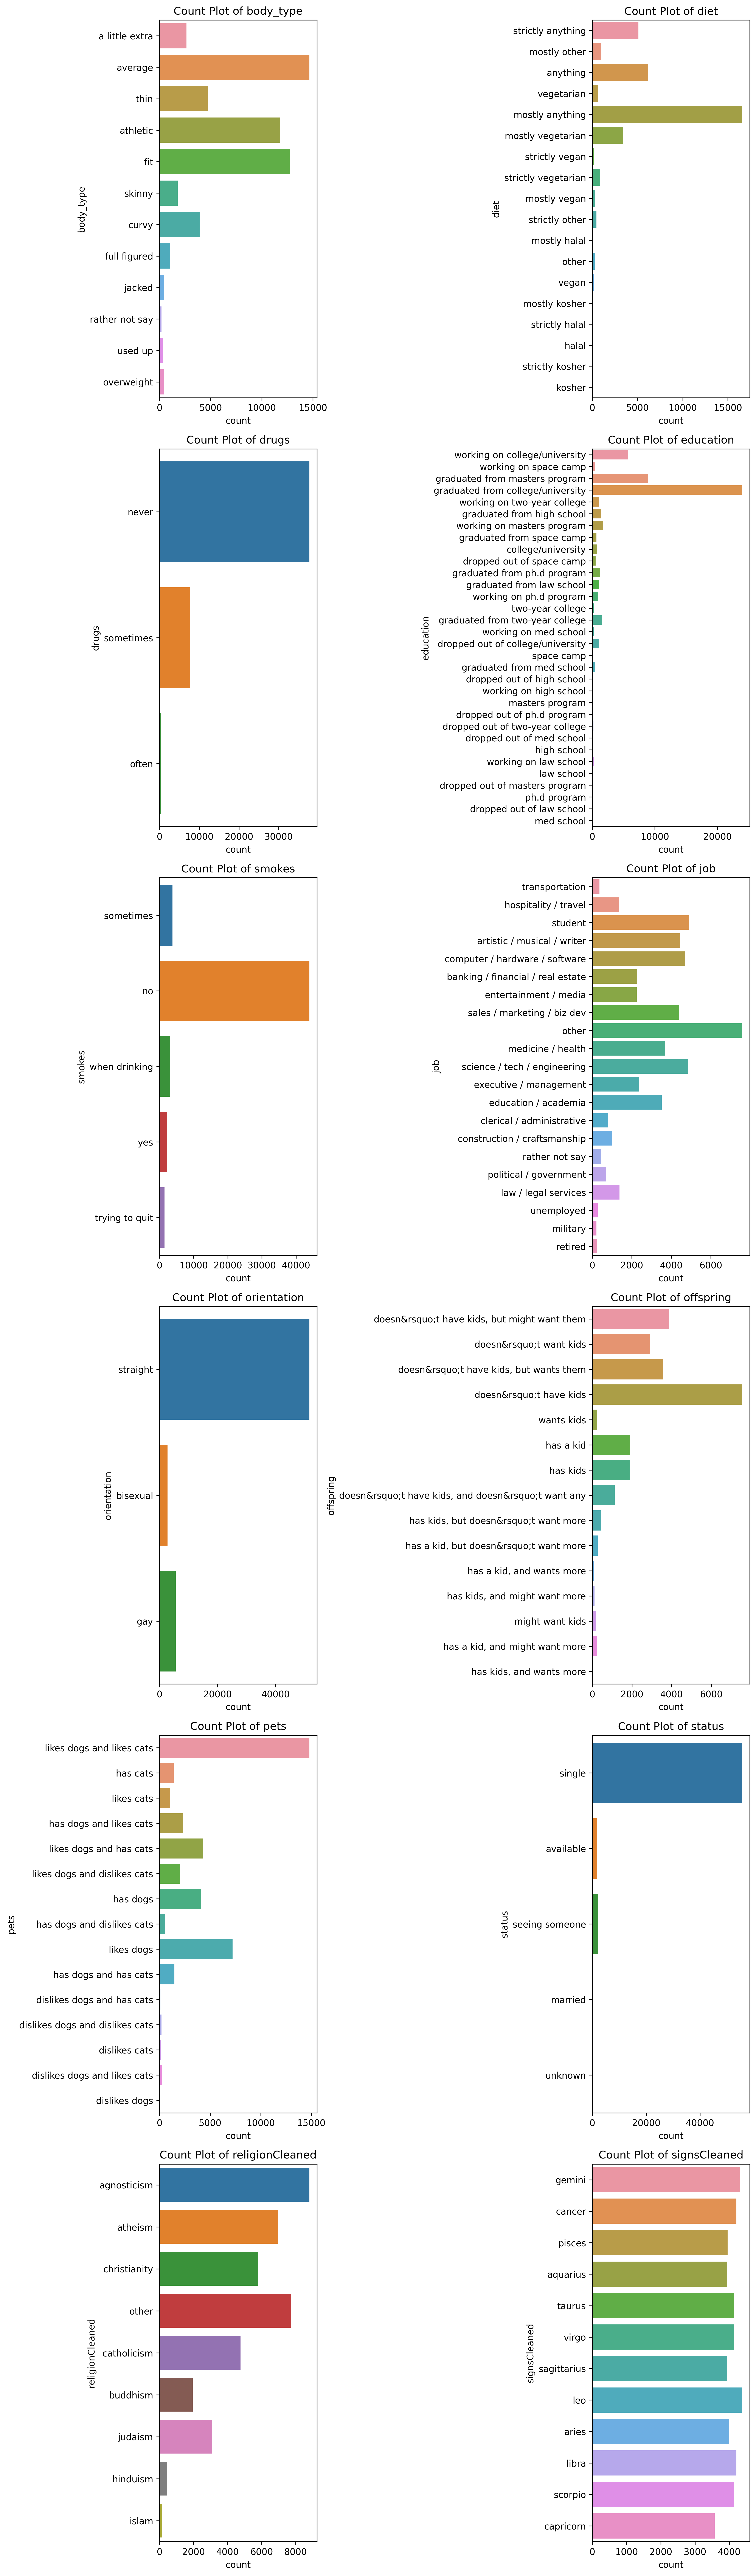

In [54]:
# Select the columns used as the data parameters
columns_count = [
    'body_type', 'diet', 'drugs', 'education', 'smokes', 'job', 'orientation', 'offspring', 'pets', 'status',
    'religionCleaned','signsCleaned']

num_columns = len(columns_count)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 40),dpi = 300)
colors = sns.color_palette("Set1", num_columns)
for i, column in enumerate(columns_count):
    row = i // 2
    col = i % 2
    sns.countplot(data=df, y=column, ax=axes[row, col])    
    axes[row, col].set_title(f'Count Plot of {column}')

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

In [55]:
df.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64

In [56]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       'sex', 'job', 'signsCleaned']
df = df[cols].dropna()
df.shape

(16453, 8)

In [57]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])
df.head()

,signsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

#Split the data into chunks
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state = 0)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

**Logistic Regression**

Logistic Regression is a linear classification algorithm used for binary classification tasks. It models the probability of an instance belonging to a certain class using a logistic function and makes predictions based on a predefined threshold.

Logistic Regression Algorithm:

Model the relationship between the features and the probability of a binary outcome.
Estimate the model parameters using maximum likelihood estimation.
Use the logistic function (sigmoid) to predict the probability of the positive class.

The Logistic Regression formula:

$$ p = \dfrac{1}{e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2+ ... + \beta_nx_n)}}$$

The sigmoid function:

$$ \sigma(z) = \dfrac{1}{1+e^{-z}}$$

C-Value - Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

Logistic regression not only predicts the class of a sample but also the probability of a sample belonging to each class. 


In [59]:
lr_params = [{'C': [0.1, 1, 10]}]

lr_model = LogisticRegression(multi_class="multinomial", solver='newton-cg')
lr_grid_search = GridSearchCV(lr_model, lr_params, cv=5)
lr_grid_search.fit(X_train, Y_train)

best_lr_params = lr_grid_search.best_params_
print(best_lr_params)
best_lr = LogisticRegression(**best_lr_params)
best_lr.fit(X_train, Y_train)
y_pred_lr = best_lr.predict(X_val)

{'C': 1}


In [60]:
print(classification_report(Y_val, y_pred_lr))

             precision    recall  f1-score   support

   aquarius       0.07      0.04      0.05       294
      aries       0.07      0.06      0.06       345
     cancer       0.09      0.22      0.13       328
  capricorn       0.14      0.04      0.07       315
     gemini       0.08      0.10      0.09       366
        leo       0.09      0.14      0.11       395
      libra       0.08      0.05      0.06       326
     pisces       0.11      0.09      0.10       337
sagittarius       0.08      0.05      0.07       347
    scorpio       0.08      0.03      0.04       355
     taurus       0.08      0.08      0.08       345
      virgo       0.09      0.14      0.11       361

avg / total       0.09      0.09      0.08      4114



In [61]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(best_lr, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08508914 0.09157212 0.08184765 0.0923825  0.08593433]
Baseline: 8.74% (0.40%)


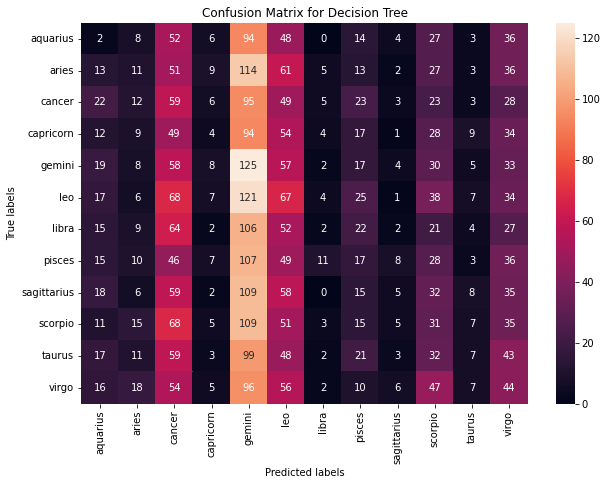

In [62]:
cart_cm = confusion_matrix(Y_val, y_pred_dt)
cart_labels = best_dt.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Decision Tree');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

**K-Nearest Neighbors (KNN) **


KNN is a non-parametric algorithm that classifies new data points based on the majority class among their nearest neighbors in the feature space. The class label is determined based on the K nearest training samples.

The K-Nearest Neighbors (KNN) formula with distance calculation:

$$ y= argmax_c \sum_{i=1}^{K}[x_i \in N_c] $$

Where the distance between two points $x_i$ and $x_j$ is calculated using the Euclidean distance:

$$ d(x_i,x_j) = \sqrt{\sum_{𝑘=1}^n(x_{i,k}−x_{j,k})^2}$$

Power parameter for the Minkowski metric. When p = 1, this is equivalent to using L1, and L2 for p = 2.


The first model is using logistic regression with the `multi_class="multinomial"` argument. Using `lr_model` predictions are created from the training dataset which is used to figure out how well the model preformed.


In [63]:
# Investigating the effects of the hyper parameters accuracy of the classifier
hyperparameters = [{
    'n_neighbors': range(5,13,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}]

# Define the K-nearest neighbours classifier and use a grid search to tune the hyperparameters.
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, hyperparameters, cv=5)
grid_search.fit(X_train, Y_train)
best_knn_params = grid_search.best_params_;

print(best_knn_params)

best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(X_train, Y_train)
knn_predictions = best_knn.predict(X_val)

{'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [64]:
print(classification_report(Y_val, knn_predictions))

             precision    recall  f1-score   support

   aquarius       0.07      0.14      0.10       294
      aries       0.11      0.18      0.14       345
     cancer       0.10      0.20      0.13       328
  capricorn       0.08      0.09      0.08       315
     gemini       0.09      0.08      0.08       366
        leo       0.11      0.09      0.10       395
      libra       0.10      0.08      0.09       326
     pisces       0.08      0.07      0.08       337
sagittarius       0.09      0.04      0.06       347
    scorpio       0.09      0.05      0.06       355
     taurus       0.08      0.05      0.06       345
      virgo       0.06      0.04      0.04       361

avg / total       0.09      0.09      0.08      4114



In [65]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(best_knn, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08225284 0.0863047  0.08711507 0.08549433 0.08917714]
Baseline: 8.61% (0.23%)


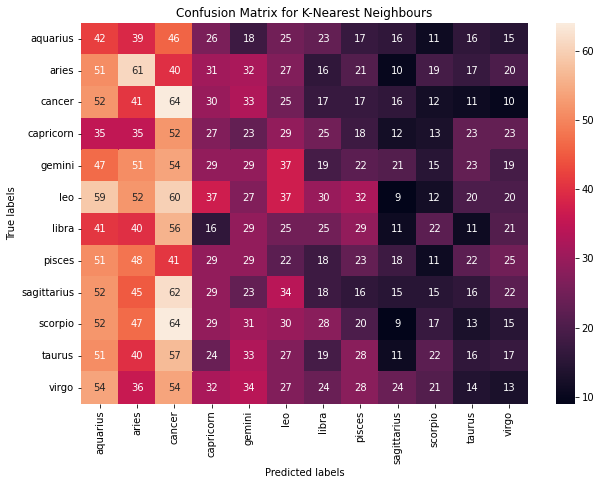

In [66]:
final_cm = confusion_matrix(Y_val, knn_predictions)
knn_labels = best_knn.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for K-Nearest Neighbours');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);

#### Decision Trees

The last model is the decision tree, the default `max_depth` is `none` which means that it will "If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.". The results are very promising because it has a 78% accuracy with this model.

In [67]:
hyperparameters = [{
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]
}]

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, hyperparameters, cv=5)
grid_search.fit(X_train, Y_train)
best_dt_params = grid_search.best_params_

best_dt = DecisionTreeClassifier(**best_dt_params)
best_dt.fit(X_train, Y_train)
y_pred_dt = best_dt.predict(X_val)

In [68]:
print(classification_report(Y_val, y_pred_dt))

             precision    recall  f1-score   support

   aquarius       0.01      0.01      0.01       294
      aries       0.09      0.03      0.05       345
     cancer       0.09      0.18      0.12       328
  capricorn       0.07      0.01      0.02       315
     gemini       0.10      0.34      0.15       366
        leo       0.10      0.17      0.13       395
      libra       0.05      0.01      0.01       326
     pisces       0.08      0.05      0.06       337
sagittarius       0.13      0.02      0.03       347
    scorpio       0.09      0.09      0.09       355
     taurus       0.11      0.02      0.03       345
      virgo       0.10      0.12      0.11       361

avg / total       0.09      0.09      0.07      4114



In [69]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(best_dt, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.09076175 0.08144246 0.08833063 0.08752026 0.08350223]
Baseline: 8.63% (0.34%)


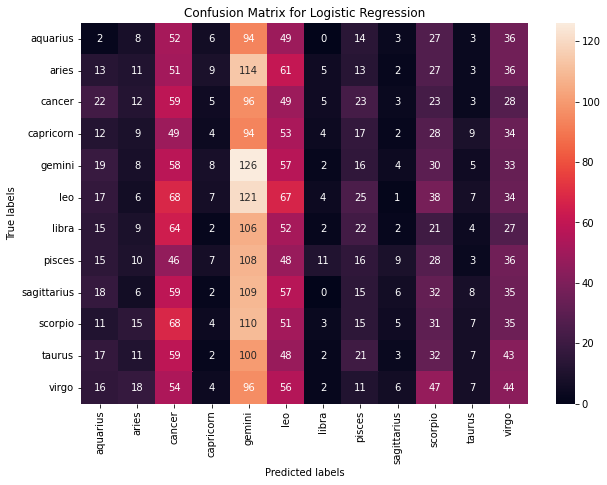

In [70]:
cart_cm = confusion_matrix(Y_val, y_pred_dt)
cart_labels = best_dt.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Logistic Regression');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

**General comments**



All predictive models show accuracy worse than guessing someones star sign at random. This signals that you cannot estimate someones star sign based off the given feature vector. 